# Linear Algebra on n-dimensional arrays

## Introduction

This notebook demonstrates some basic linear algebra operations and Numpy array, for someone who has basic understanding of the aforementioned topics, by representing and manipulating n-dimensional arrays (n >= 2), most importantly, without using for-loops that might be the first guess for solving such problems in any language. This notebook also clarifies understanding of axis and shape properties of any Numpy-inherited objects.

## Learning Objectives

* Understand the differences between dimensionality of Numpy arrays.
* Understand application of some linear algebra operations on n-dimensional arrays without for-loops.
* Understand axis and shape properties for n-dimensional arrays.

In [1]:
from scipy import misc
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
img = misc.face()
type(img)

numpy.ndarray

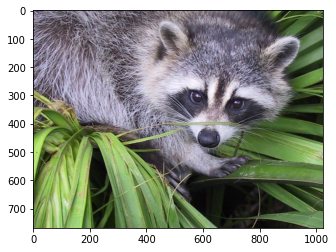

In [4]:
plt.imshow(img)
plt.show()

In [5]:
img.shape

(768, 1024, 3)

In [6]:
img.ndim

3

In [7]:
img[:, :, 0]

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8)

In [8]:
img[:, :, 0].shape

(768, 1024)

In [9]:
img_array = img / 255

In [10]:
img_array.min(), img_array.max()

(0.0, 1.0)

In [11]:
img_array.dtype

dtype('float64')

In [12]:
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

In [13]:
img_gray = img_array @ [0.2126, 0.7152, 0.0722]
img_gray.shape

(768, 1024)

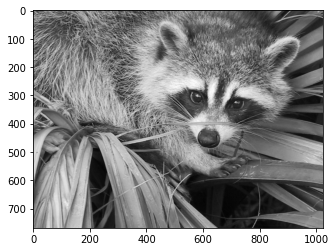

In [14]:
plt.imshow(img_gray, cmap='gray')
plt.show()

In [15]:
U, s, Vt = linalg.svd(img_gray)
U.shape, s.shape, Vt.shape

((768, 768), (768,), (1024, 1024))

In [16]:
sigma = np.zeros((U.shape[1], Vt.shape[0]))
np.fill_diagonal(sigma, s)

In [17]:
linalg.norm(img_gray - U @ sigma @ Vt)

1.3839396433172228e-12

In [18]:
np.allclose(img_gray, U @ sigma @ Vt)

True

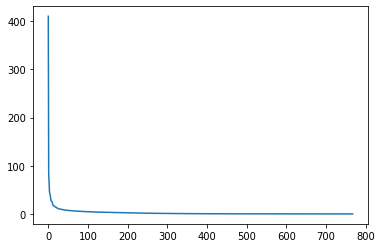

In [19]:
plt.plot(s)
plt.show()

In [20]:
k = 25
approx = U @ sigma[:, :k] @ Vt[:k, :]

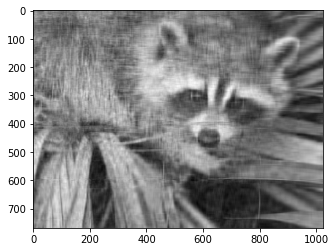

In [21]:
plt.imshow(approx, cmap='gray')
plt.show()

In [22]:
img_array.shape

(768, 1024, 3)

In [23]:
img_array_transposed = np.transpose(img_array, axes=(2, 0, 1))
img_array_transposed.shape

(3, 768, 1024)

In [24]:
U, s, Vt = linalg.svd(img_array_transposed)
U.shape, s.shape, Vt.shape

((3, 768, 768), (3, 768), (3, 1024, 1024))

In [25]:
Sigma = np.zeros((3, 768, 1024))
for j in range(3):
    np.fill_diagonal(Sigma[j, :, :], s[j, :])

In [26]:
reconstructed = U @ Sigma @ Vt
reconstructed.shape

(3, 768, 1024)

In [27]:
reconstructed.min(), reconstructed.max()

(-4.84784738394306e-15, 1.0000000000000042)

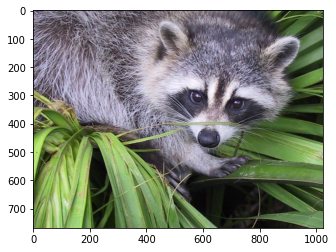

In [28]:
reconstructed = np.clip(reconstructed, 0, 1)
plt.imshow(np.transpose(reconstructed, (1, 2, 0)))
plt.show()

In [29]:
approx_img = U @ Sigma[..., :k] @ Vt[..., :k, :]
approx_img.shape

(3, 768, 1024)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


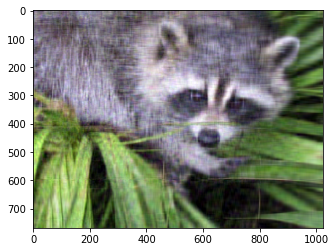

In [30]:
plt.imshow(np.transpose(approx_img, axes=(1, 2, 0)))
plt.show()